# Task 1

## 1. Derivation of the Logistic Regression Objective Function Using MLE (see reference[3])

We consider a binary classification problem with training data $ \{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^n $, where $ \mathbf{x}^{(i)} \in \mathbb{R}^d $ is the feature vector and $ y^{(i)} \in \{0, 1\} $ is the label for the $ i $-th data point.

We assume the following:
- The data points are independent and identically distributed (I will use i.d.d in the future)
- The conditional probability of the label is as follows:

$$
P(y = 1 \mid \mathbf{x}; \boldsymbol{\theta}) = \sigma(\mathbf{x}^\top \boldsymbol{\theta}) = \frac{1}{1 + e^{-\mathbf{x}^\top \boldsymbol{\theta}}}
$$

$$
P(y = 0 \mid \mathbf{x}; \boldsymbol{\theta}) = 1 - \sigma(\mathbf{x}^\top \boldsymbol{\theta})
$$

---

### Combind our Conditional Probability Expressions

$$
P(y \mid \mathbf{x}; \boldsymbol{\theta}) =
\sigma(\mathbf{x}^\top \boldsymbol{\theta})^y \cdot (1 - \sigma(\mathbf{x}^\top \boldsymbol{\theta}))^{1 - y}
$$

This works because:
- If $ y = 1 $, then the expression becomes $ \sigma(\mathbf{x}^\top \boldsymbol{\theta}) $
- If $ y = 0 $, then it becomes $ 1 - \sigma(\mathbf{x}^\top \boldsymbol{\theta}) $

---

### Likelihood of the Dataset

If like in our original assumtion the data is i.i.d., the likelihood of the full dataset is the product of the individual probabilities:

$$
L(\boldsymbol{\theta}) = \prod_{i=1}^n P(y^{(i)} \mid \mathbf{x}^{(i)}; \boldsymbol{\theta}) =
\prod_{i=1}^n \left[
\sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta})^{y^{(i)}} \cdot (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))^{1 - y^{(i)}}
\right]
$$

---

### Log Likelihood 

To simplify the product we take the logarithm of the likelihood:

$$
\ell(\boldsymbol{\theta}) = \log L(\boldsymbol{\theta}) = \log \prod_{i=1}^n a_i = \sum_{i=1}^n \log a_i
$$

We now substitue $a_i$ with our expression from earlier:

$$
a_i = \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta})^{y^{(i)}} \cdot (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))^{1 - y^{(i)}}
$$

Using $ \log(ab) = \log a + \log b $:

$$
\log a_i = y^{(i)} \log \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}) +
(1 - y^{(i)}) \log (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))
$$

Which gives us:

$$
\ell(\boldsymbol{\theta}) = \sum_{i=1}^n \left[
y^{(i)} \log \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}) +
(1 - y^{(i)}) \log (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))
\right]
$$

---

### Objective Function

Our goal is to maximize the log likelihood, However, as instructed in class we should we minimize the negative log likelihood:

$$
W(\boldsymbol{\theta}) = -\ell(\boldsymbol{\theta}) =
- \sum_{i=1}^n \left[
y^{(i)} \log \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}) +
(1 - y^{(i)}) \log (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))
\right]
$$

## 2. MAP vs MLE (see reference 4)

### Maximum Likelihood Estimation (MLE)

- MLE chooses the parameters $ \boldsymbol{\theta} $ that make the observed data most likely
- MLE treats the parameters as fixed but unknown quantities.
- MLE does not include any prior beliefs about $ \boldsymbol{\theta}, it only uses the observed data.

MLE can be defined as:

$$
\hat{\boldsymbol{\theta}}_{\text{MLE}} = \arg\max_{\boldsymbol{\theta}} \; P(\mathcal{D} \mid \boldsymbol{\theta})
$$

Where:
- $ \mathcal{D} $ is the dataset (with inputs $ \mathbf{X} $ and labels $ \mathbf{y} $),
- $ P(\mathcal{D} \mid \boldsymbol{\theta}) $ is the likelihood of the data given the parameters.

### Maximum A Posteriori Estimation (MAP)

MAP extends MLE by including a prior belief about the parameters. It uses Bayes’ theorem to compute a posterior distribution over parameters:

$$
P(\boldsymbol{\theta} \mid \mathcal{D}) = \frac{P(\mathcal{D} \mid \boldsymbol{\theta}) \cdot P(\boldsymbol{\theta})}{P(\mathcal{D})}
$$

MAP then chooses the parameters that maximize this:

$$
\hat{\boldsymbol{\theta}}_{\text{MAP}} = \arg\max_{\boldsymbol{\theta}} \; P(\boldsymbol{\theta} \mid \mathcal{D}) = \arg\max_{\boldsymbol{\theta}} \; P(\mathcal{D} \mid \boldsymbol{\theta}) \cdot P(\boldsymbol{\theta})
$$

Where:
- $ P(\boldsymbol{\theta}) $ is the prior distribution over parameters

## 2. Machine Learning Problem and Model Justification (see reference 7)

### Problem Definition

I wish to use logistic regression to classify particle collision events as either signal (Higgs boson production) or background (standard processes).

We can formulate this as a binary classification task by making:
- `1` = signal event
- `0` = background event

### Why Should We Use Logistic Regression?

- Logistic regression is built for binary classification problems like signal vs. background
- Logistic regression is gives probabilities (For example, 80% chance of signal), which helps physicists decide if an event is likely Higgs boson production.
- Collision data often has features that can be separated linearly
- Logistic regression is more resistant to noisy data from particle collisions which can help avoid overfitting

### Comparison to Linear Support Vector Machine (Linear SVM)

#### Similarity:
- Both create a straight line to separate signal from background events
- Both work well with large datasets and can handle many features
- Both use regularization to avoid overfitting

#### Difference:
- Logistic regression gives probabilities whereas Linear SVM gives a yes/no classification
- Logistic regression optimizes for accurate probabilities. Linear SVM focuses on maximizing the gap between signal and background
- Logistic regression is better with noisy data whereas Linear SVM can be affected more by outliers


## 3. Dataset and Equation Correspondence

In the derivation of logistic regression, each training instance was defined as a pair $ (\mathbf{x}^{(i)}, y^{(i)}) $, where:

- $ \mathbf{x}^{(i)} \in \mathbb{R}^d $: a feature vector  
- $ y^{(i)} \in \{0, 1\} $: a binary label  
- $ \boldsymbol{\theta} \in \mathbb{R}^d $: model parameters

This maps directly to the HIGGS dataset as follows:

- Each row in the dataset is a collision event, so $ i = 1, \dots, n $ with $ n \approx 11,000,000 $
- The feature vector $ \mathbf{x}^{(i)} $ consists of 28 features per event including momentum, transverse energy, etc
- The label $ y^{(i)} $ is a binary indicator: `1` for signal, `0` for background

### Modeling Assumptions

- We assume each event is treated as conditionally independent of the others, which is reasonable given the simulation based nature of the data


# Task 2

## 1. Dataset Selection

For this task, I selected the **HIGGS dataset** from the UCI Machine Learning Repository.

- **Dataset link**: [https://archive.ics.uci.edu/dataset/280/higgs](https://archive.ics.uci.edu/dataset/280/higgs)
- **Instances**: 11,000,000
- **Features**: 28 per event
- **Target**: Binary classification
  - `1` = signal event 
  - `0` = background event

## 2. Perform Exploratory Data Analysis (EDA) (see reference [9])

In this section, we will preform EDA on a subset of the HIGGS dataset. This EDA will focusing on detecting and addressing multicollinearity.

### Impact of Multicollinearity 

Multicollinearity occurs when two or more input features are highly linearly correlated. This can cause some issues including, but not limited to:

- Difficulty in interpreting feature importance
- Potential overfitting or reduced model generalization

To fix this, we will apply a **Variance Inflation Factor (VIF)** to quantify the degree of multicollinearity in the dataset.

### Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) measures how much the variance of an estimated regression coefficient increases due to multicollinearity. The calculation for it is as follows\:

$$
\text{VIF}(x_i) = \frac{1}{1 - R_i^2}
$$

Where:
- $x_i$ is the $i$-th feature
- $R_i^2$ is the coefficient of determination which we can obtain by regressing $x_i$ on all other features

Here is a rought evaluation of VIF values:
- $\approx 1$ indicates no multicollinearity
- $> 5$ indicates moderate multicollinearity
- $> 10$ suggests severe multicollinearity

### Steps Taken

1. Loaded a 100,000 row subset of the HIGGS dataset for memory efficiency.
2. Standardized all features to have zero mean and unit variance for comparability.
3. Computed VIF scores using `statsmodels` to identify features with high multicollinearity.
4. Removed features with `VIF > 10`, indicating strong linear correlation with other features.

> **Note:** This is a simple way to reduce multicollinearity. Removing features can lead to information loss and reduce model performance. More advanced approaches like **dimensionality reduction** exist but it is not used here for simplicity and time constraints on this assignment.

In [ ]:
# imports
# Note this kernal is running in under the hw01 directory
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Name the columns as this data set does not come with the labels in the csv (see reference[13])
columns = [
    "label",
    "lepton_pT", "lepton_eta", "lepton_phi",
    "missing_energy_magnitude", "missing_energy_phi",
    "jet_1_pt", "jet_1_eta", "jet_1_phi", "jet_1_b_tag",
    "jet_2_pt", "jet_2_eta", "jet_2_phi", "jet_2_b_tag",
    "jet_3_pt", "jet_3_eta", "jet_3_phi", "jet_3_b_tag",
    "jet_4_pt", "jet_4_eta", "jet_4_phi", "jet_4_b_tag",
    "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"
]

# Load a subset of the HIGGS dataset
df = pd.read_csv("data/HIGGS.csv.gz", compression="gzip", names=columns, nrows=100_000)


# Separate target and features
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Function to calculate VIF
def compute_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Compute VIF and identify high VIF features to be removed
vif_df = compute_vif(X_scaled)
high_vif_df = vif_df[vif_df["VIF"] > 10].sort_values("VIF", ascending=False)

# Print dropped features with their VIF
if not high_vif_df.empty:
    print("Removed features:")
    for _, row in high_vif_df.iterrows():
        print(f"- {row['feature']}: VIF = {row['VIF']:.2f}")
else:
    print("No features had VIF > 10.")

# Drop those features
X_reduced = X_scaled.drop(columns=high_vif_df["feature"].tolist())

# Add back target column and save
X_reduced["target"] = y.values
X_reduced.to_csv("data/HIGGS_subset_clean.csv", index=False)

print(f"\nSaved cleaned dataset with {X_reduced.shape[1] - 1} features to 'data/HIGGS_subset_clean.csv'")


No features had VIF > 10.

Saved cleaned dataset with 28 features to 'data/HIGGS_subset_clean.csv'


## 3. Visualize Feature Relationships

### Techniques Used

1. **Pair Plot with Kernel Density Estimates (KDE)**  
   This technique should show the relationships between selected features and highlight the class separation between signal and background using KDE along the diagonals.

2. **Heatmap with Hierarchical Clustering**  (see reference[14])  
   This technique should displays the correlation matrix of features and show strongly correlated variables visually.


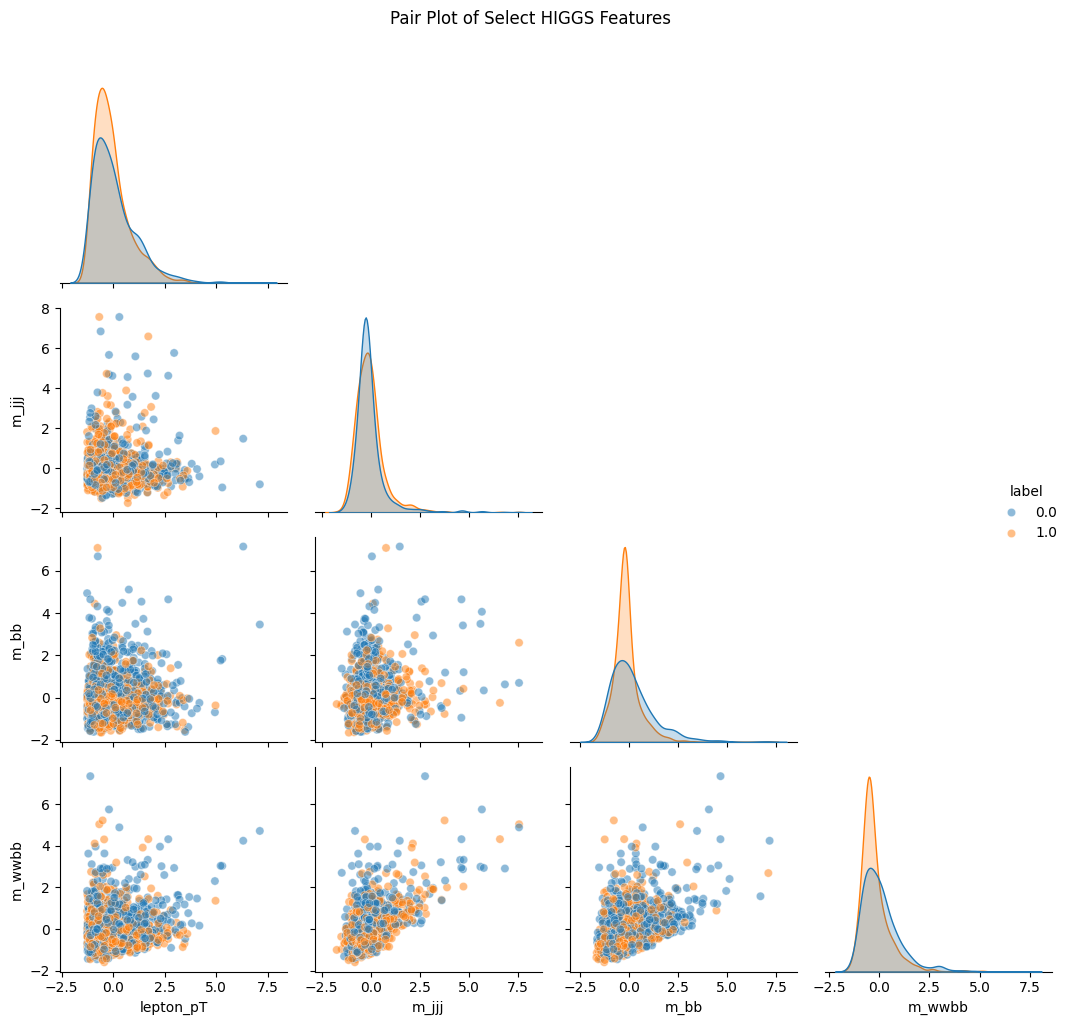

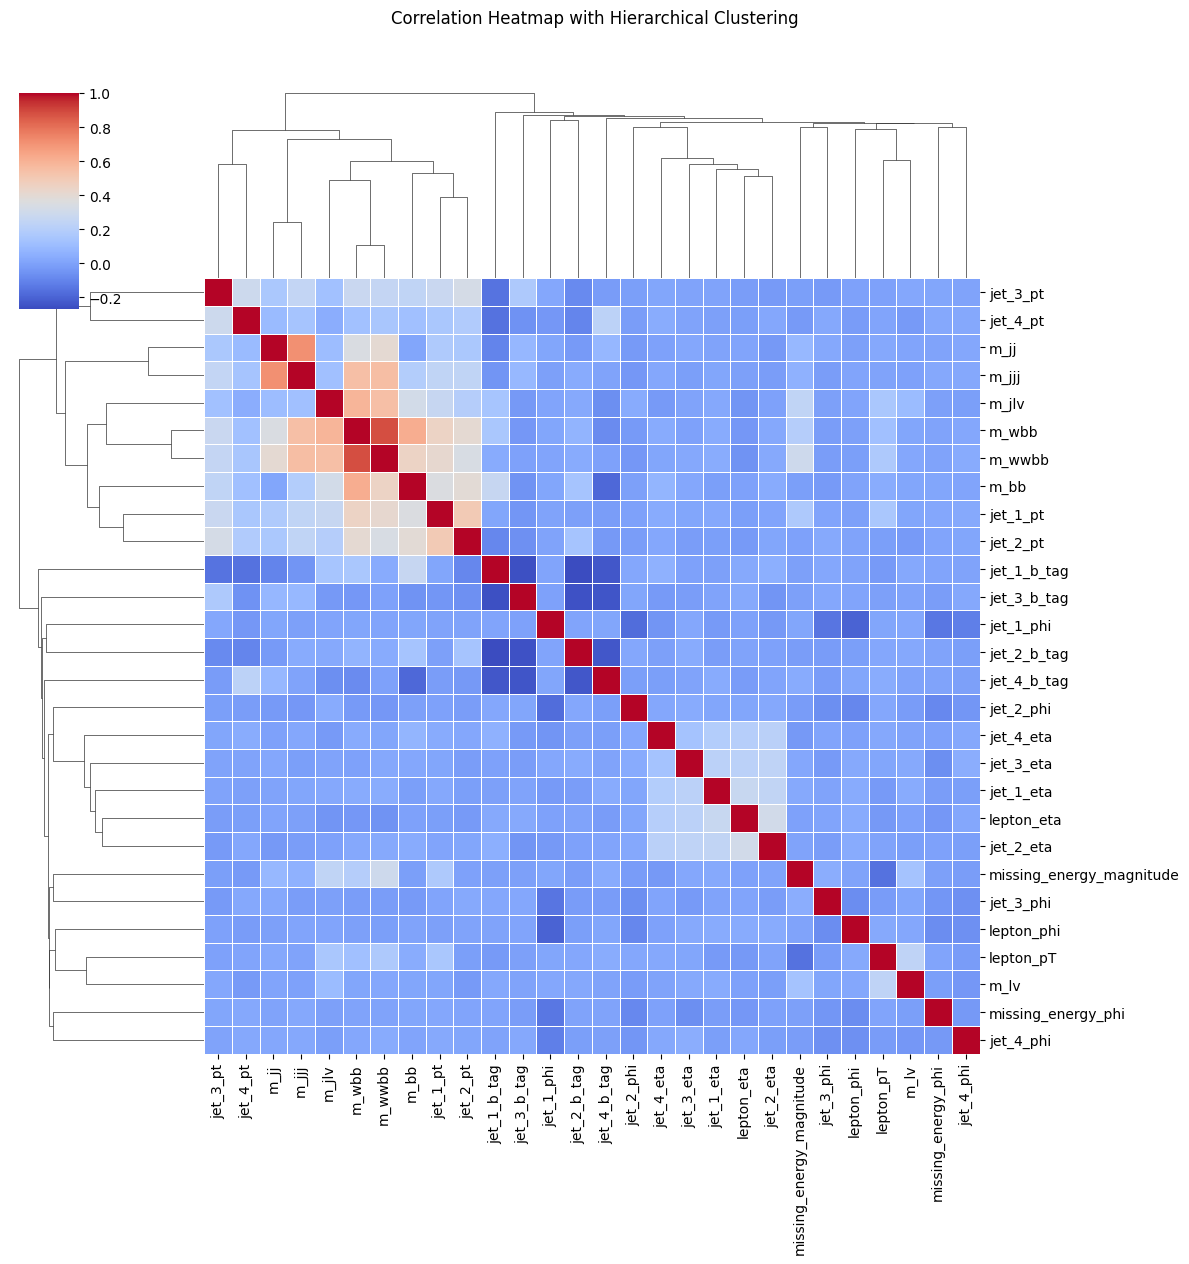

In [19]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy

# Load the cleaned dataset
df = pd.read_csv("data/HIGGS_subset_clean.csv")

# Rename label column
df.rename(columns={"target": "label"}, inplace=True)

# Sample a smaller subset so our plots dont become to clustered
df_sample = df.sample(n=2000, random_state=42)

# Pair Plot with KDE 

# Random Selection of Features to compare
selected_features = [
    "lepton_pT",
    "m_jjj",
    "m_bb",
    "m_wwbb",
    "label"
]

# Pairplot with KDE diagonals and colored by class
sns.pairplot(df_sample[selected_features], hue="label", diag_kind="kde", corner=True, plot_kws={"alpha": 0.5})
plt.suptitle("Pair Plot of Select HIGGS Features", y=1.02)
plt.tight_layout()
plt.show()

# Correlation Heatmap with Feature Clustering

# Drop the label column for correlation matrix
features_only = df_sample.drop(columns=["label"])

# Compute correlation matrix
corr = features_only.corr()

# Create hierarchical clustering linkage
linkage = hierarchy.linkage(corr, method="average")

# Create clustered heatmap
g = sns.clustermap(
    corr,
    cmap="coolwarm",
    linewidths=0.5,
    figsize=(12, 12),
    row_linkage=linkage,
    col_linkage=linkage,
    xticklabels=True,
    yticklabels=True
)

# Rotate labels for readability
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.suptitle("Correlation Heatmap with Hierarchical Clustering", y=1.05)
plt.show()


### Interpretation of Visualizations

#### Pair Plot
- The diagonal KDE plots show slight differences in the shape and position of the class distributions but are most noticable for `m_bb` and `m_wwbb`.
- Most scatter plots show significant overlap between classes

#### Correlation Heatmap
- Some features are strongly correlated with each other (These expectedly include the engineered ones like `m_wbb`, `m_wwbb`, and `m_jlv`)
- Other features  like `missing_energy_phi` are less correlated and may offer unique information.


# Task 3

## 1. Implementation of Logitic Regression 

In [22]:
import numpy as np

class LogisticRegressionSelfImplement:
    def __init__(self, learning_rate=0.01, num_iters=1000, batch_mode="batch", batch_size=32, verbose=True):

        # Initialize the logistic regression model with the following parameters
        # - learning_rate: Step size for gradient descent updates
        # - num_iters: Number of training iterations
        # - batch_mode: 'batch', 'stochastic', or 'mini-batch' to select gradient descent variant
        # - batch_size: Size of mini-batches if selected
        # - verbose: prints loss every 100 iterations if true
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.batch_mode = batch_mode
        self.batch_size = batch_size
        self.verbose = verbose

        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        # Standard to avoid log(0)
        epsilon = 1e-15 
        # Cost function dervied from task 1
        return -np.mean(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

    def fit(self, X, y):
        # Train the model using the selected gradient descent strategy
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iters):
            # see reference [17]
            if self.batch_mode == "batch":
                # Use the full dataset each iteration
                X_batch, y_batch = X, y

            # see reference [15]
            elif self.batch_mode == "stochastic":
                # Use one random sample each iteration
                rand_index = np.random.randint(m)
                X_batch = X[rand_index:rand_index+1]
                y_batch = y[rand_index:rand_index+1]

            # see reference [16]
            elif self.batch_mode == "mini-batch":
                # Use a random subset of the data each iteration
                rand_index = np.random.choice(m, self.batch_size, replace=False)
                X_batch = X[rand_index]
                y_batch = y[rand_index]

            # Forward pass
            z = np.dot(X_batch, self.weights) + self.bias
            h = self.sigmoid(z)
            cost = self.cost_function(h, y_batch)
            self.loss_history.append(cost)

            # Gradient calculation
            dw = np.dot(X_batch.T, (h - y_batch)) / X_batch.shape[0]
            db = np.sum(h - y_batch) / X_batch.shape[0]

            # Parameter update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Progress output
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Loss = {cost:.4f} (mode: {self.batch_mode})")

    def predict_probability(self, X):
        # Compute predicted probabilities
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        # Predict class labels based on a threshold of 0.5 or 50%
        return (self.predict_probability(X) >= threshold).astype(int)


### 2. Convergence Properties of Gradient Descent Variants Implemented Above

- **Batch Gradient Descent:**  
  Uses the full dataset per update leading to a stable but slow convergence.

- **Stochastic Gradient Descent:**  
  Updates with one sample at a time leading to a fast but noisy and less stable convergence.

- **Mini-Batch Gradient Descent:**  
  Updates with small batches leading to a convergence that is faster than BGD and smoother than SGD.


## References

1. Cornell University. (n.d.). *Logistic Regression*. CS 4780: Machine Learning.  
   Retrieved from https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html

2. Murphy, K. P. (2022). *Probabilistic Machine Learning: An Introduction*. MIT Press.  
   Retrieved from https://www.cs.ubc.ca/~murphyk/PMLbook/book1.html

3. NucleusBox. (n.d.). *Cost Function in Logistic Regression – Understanding the Theory Behind the Loss*.  
   Retrieved from https://www.nucleusbox.com/cost-function-in-logistic-regression/

4. Schmidt, M. (2017). *MLE and MAP Estimation* [Lecture slides]. CPSC 340, University of British Columbia.  
   Retrieved from https://www.cs.ubc.ca/~schmidtm/Courses/340-F17/L25.pdf

5. University of Pennsylvania. (n.d.). *Logistic Regression - CIS 520 Machine Learning*.  
   Retrieved from https://alliance.seas.upenn.edu/~cis520/wiki/index.php?n=Lectures.Logistic

6. Wu, S. (n.d.). *Lecture 5: Logistic Regression* [PDF]. CSCI 5525 - Machine Learning, University of Minnesota.  
   Retrieved from https://zstevenwu.com/courses/s20/csci5525/resources/slides/lecture05.pdf
   
7. Cortes, C., & Vapnik, V. (1995). *Support-vector networks*. Machine Learning, 20(3), 273–297.  
   Retrieved from https://doi.org/10.1007/BF00994018

8. QuickRef. (n.d.). *LaTeX Math Symbols Cheat Sheet*.  
   Retrieved from https://quickref.me/latex.html

9. Investopedia. (2025). *Variance Inflation Factor (VIF)*.    
   Retrieved from https://www.investopedia.com/terms/v/variance-inflation-factor.asp

10. PyTorch. (2025). *PyTorch Documentation (Stable)*.   
    Retrieved from https://docs.pytorch.org/docs/stable/index.html

11. pandas. (2025). *pandas Documentation*.  
    Retrieved from https://pandas.pydata.org/docs/

12. Statsmodels. (2025). *Statsmodels Documentation (Stable)*.    
    Retrieved from https://www.statsmodels.org/stable/index.html

13. Weichert, N. (2019). *Identifying Higgs Bosons from Background Noise (with PySpark)*.   
    Retrieved from https://medium.com/data-science/identifying-higgs-bosons-from-background-noise-pyspark-d7983234207e

14. Galella, S. (2021). *Correlation Heatmaps with Hierarchical Clustering*.  
    Retrieved from https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-
    
15. GeeksforGeeks. (2023). *Stochastic Gradient Descent (SGD) in Machine Learning*.  
    Retrieved from https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

16. GeeksforGeeks. (2023). *Mini-Batch Gradient Descent in Deep Learning*.  
    Retrieved from https://www.geeksforgeeks.org/mini-batch-gradient-descent-in-deep-learning/

17. GeeksforGeeks. (2023). *Gradient Descent Algorithm and Its Variants*.  
    Retrieved from https://www.geeksforgeeks.org/gradient-descent-algorithm-and-its-variants/





